# Context

- This is an example of a notebook to demonstrate pycaret library for anomoly/outlier detection. In this example we will do some exploratory data analysis on the famous Iris dataset and then we build few models using pycaret for anomoly/outlier detection using supervised target feature.
- PyCaret is a Python open source machine learning library designed to make performing standard tasks in a machine learning project easy.
    - It is a flexible and low-code library that enhances productivity thus saving time and effort.
    - PyCaret is a simple and easy-to-use machine learning library that enables us to perform ML tasks within minutes.
    - PyCaret library allows automating the machine learning steps such as data transformation, preparation, hyper-parameter tuning, and standard model comparisons.



# Data Attributes
- The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import seaborn; seaborn.set()
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
sns.set_theme()

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
# border creation

In [40]:
# import file
df=pd.read_csv('iris.csv')

In [41]:
# shape of the data
df.shape

(150, 5)

In [23]:
# get basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


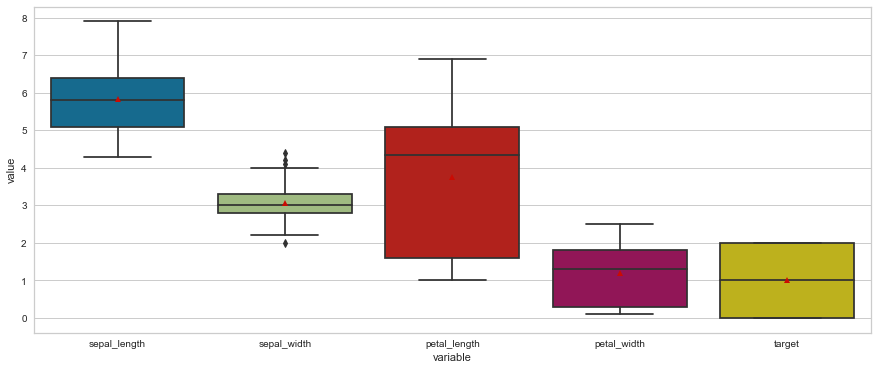

In [59]:
# distribution of the data
plt.figure(figsize=(15,6))
sns.boxplot(x="variable", y="value", showmeans=True, data=pd.melt(df))
plt.show()

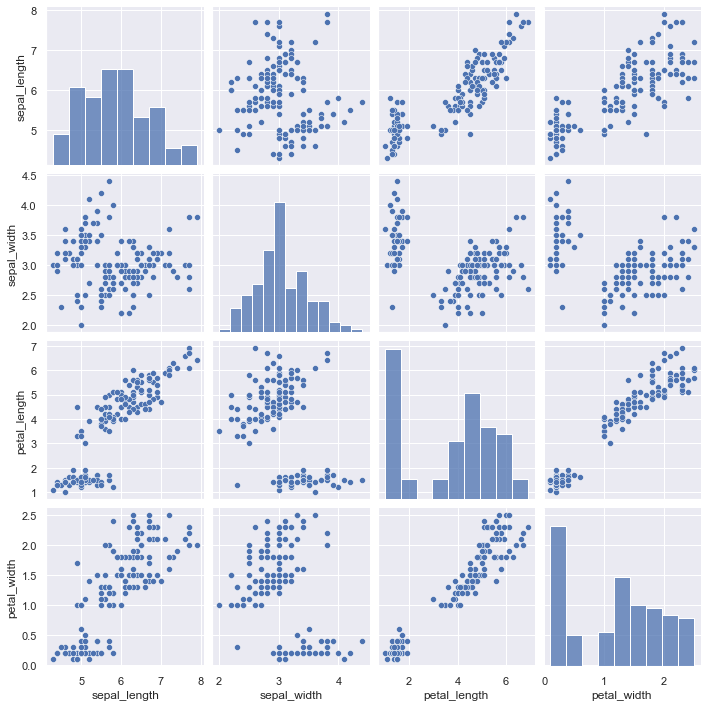

In [25]:
# relationship between variables.
sns.pairplot(df);

- We see linear relationship among the variables.
- We can indentify 2 clusters.

------------

## Anomoly/Outlier Detection model building.

In [43]:
from pycaret.anomaly import *
setup = setup(df, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(150, 5)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(150, 7)"
9,CPU Jobs,-1


- Specify the session id, this results in processing after execution. It interprets numerous types of variables automatically and allows us to confirm by pressing ENTER to continue.

- Observe that our dataset consists of 5, 150 rows each. We can perform various imputations- numeric and categorical or normalize the data. But we don’t require such transformations in our dataset so let us continue!

- Performing all these computations with a few lines of code presents the beauty of the PyCaret library.

In [27]:
# get list of models.
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


- List of model can be build from the above table for Anomoly/Outlier detection.
- For this excercise I will build 3 models (iforest, loc and Outlier).

## iForest model

In [44]:
# building iforest model with estimator as random forest.
iforest_model = tune_model(model = 'iforest', supervised_target ='target', supervised_estimator='rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0.0,0.9467,0.0000,0.3800,0.4000,0.3894,nan,0.2000
0.01,0.9452,0.0000,0.3800,0.4000,0.3894,nan,0.2000
0.02,0.9443,0.0000,0.3800,0.4000,0.3894,nan,0.2000
0.03,0.9433,0.0000,0.3790,0.4000,0.3889,nan,0.2000
0.04,0.9429,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.05,0.9429,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.06,0.9357,0.0000,0.3714,0.4000,0.3846,nan,0.2000
0.07,0.9429,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.08,0.9484,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.09,0.9478,0.0000,0.3786,0.4000,0.3886,nan,0.2000


- From the above we can observe that when the when the anomoly fraction is at 0 the accuracy of the model was at 0.9467 and then model accuracy gradually drops, after  0.06 anomoly fraction we can can see the model accuracy incrases and the final model accuracy is at 0.9467.

## Local outlier factor model building

In [45]:
# building loc model with estimator as random forest.
lof_model = tune_model(model = 'lof', supervised_target ='target', supervised_estimator='rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0.0,0.9467,0.0000,0.3800,0.4000,0.3894,nan,0.2000
0.01,0.9386,0.0000,0.3733,0.3889,0.3798,nan,0.1873
0.02,0.9381,0.0000,0.3733,0.3889,0.3798,nan,0.1873
0.03,0.9367,0.0000,0.3724,0.4000,0.3852,nan,0.2000
0.04,0.9429,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.05,0.9429,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.06,0.9429,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.07,0.9429,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.08,0.9412,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.09,0.9401,0.0000,0.3786,0.4000,0.3886,nan,0.2000


- Local Outlier Factor model accuracy is at 0.9319.

## Cluster model building

In [46]:
# building cluster model with estimator as random forest.
cluster_model = tune_model(model = 'cluster', supervised_target ='target', supervised_estimator='rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0.0,0.9467,0.0000,0.3800,0.4000,0.3894,nan,0.2000
0.01,0.9452,0.0000,0.3800,0.3889,0.3835,nan,0.1873
0.02,0.9448,0.0000,0.3800,0.3875,0.3827,nan,0.1875
0.03,0.9367,0.0000,0.3724,0.4000,0.3852,nan,0.2000
0.04,0.9357,0.0000,0.3714,0.4000,0.3846,nan,0.2000
0.05,0.9500,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.06,0.9429,0.0000,0.3714,0.4000,0.3846,nan,0.2000
0.07,0.9500,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.08,0.9484,0.0000,0.3786,0.4000,0.3886,nan,0.2000
0.09,0.9478,0.0000,0.3786,0.4000,0.3886,nan,0.2000


- From the above cluster model we can observe that the accuracy is at 0.9544
- **From the three models I have built I can obseve that the Cluster model having higher accuracy.**

In [47]:
# assign the cluster model to data frame.
cluster_results = assign_model(cluster_model)
cluster_results.head()

,sepal_length,sepal_width,petal_length,petal_width,target,Anomaly,Anomaly_Score
0,5.1,3.5,1.4,0.2,0,0,0.268103
1,4.9,3.0,1.4,0.2,0,0,0.223945
2,4.7,3.2,1.3,0.2,0,0,0.141955
3,4.6,3.1,1.5,0.2,0,0,0.141955
4,5.0,3.6,1.4,0.2,0,0,0.298188


In [49]:
# frequencies of anomolies in the cluster model.
cluster_results.Anomaly.value_counts(normalize=True)

0    0.9
1    0.1
Name: Anomaly, dtype: float64

- Cluster model recognises that 1 of the data points are anomolies.

In [56]:
# 2d view of Anomoly
evaluate_model(cluster_model);

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Anomaly TSnE (3d)', 'tsn…

- Highlighed yellow are the anomolies.

In [51]:
# scatter plot
evaluate_model(cluster_model);

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Anomaly TSnE (3d)', 'tsn…

- We can zoom this 2D plot to view which points were considered as outliers/anomolies.

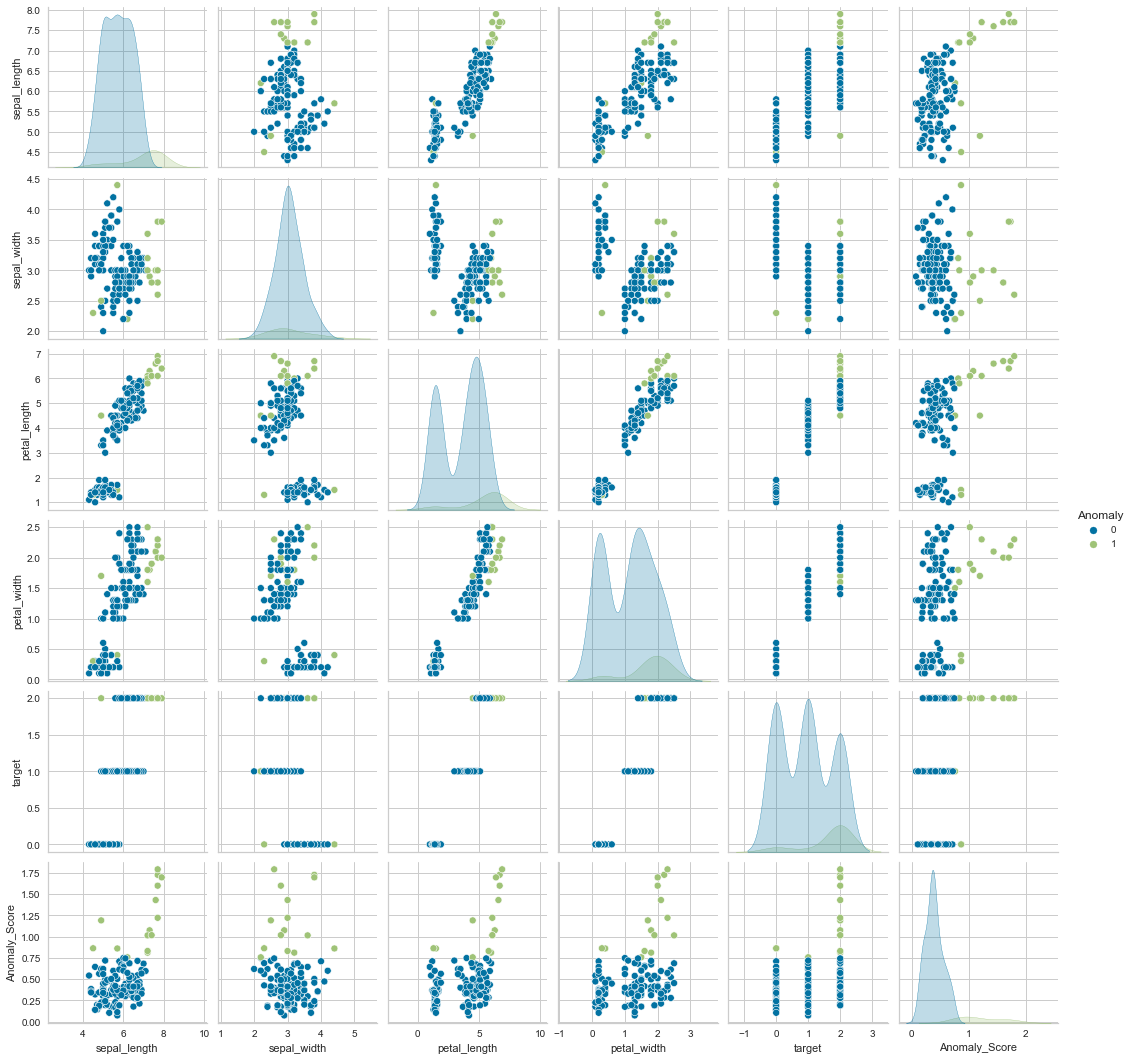

In [55]:
# pairplot of the cluster model with anomoly as hue
sns.pairplot(cluster_results, hue = "Anomaly");

- From the above we can obseve the anomolies scattered across.